# 🎲 Ludo tracker

## 🗑️ Description 
You should implement a system that recognizes the state of gameplay from the movie (in the selected board game). The program should track the movement of counters, dice, cards and detect events on the film.
The task is also to find the appropriate input data (or your own video recording).

The input data should be divided into 3 groups depending on the difficulty for example:
easy: perfect view, the game elements are not covered with your hands when carrying it...
medium: different dynamics of light in the picture, shadows, light reflections...
difficult: angled view, game components partially covered with hands when moving, slight shaking of the camera...
Each data group should have at least 3 representative clips (max 5 min per clip).

The selected game may be a real board game or some extension of it. It cannot be a computer game, although computer simulations can be used to test solutions or to train ML models.

Typical card games such as poker, macau, bridge … that contain only cards are insufficient and must be extended with some additional elements that should be consulted.
Don’t use NN.


### Requirements
3.0:
* preparation of a data set,
* preparation and presentation of the results (e.g. a game video with information about true events - described below)
* detection of at least 2 elements of the game: counter, dice, card, figure….
tracking some element of game: counters, dices, cards in the movie
* a report containing:
    * Informations from milestone 1,
    * description of the data set, with a few image examples,
    * description of the used techniques along with the intermediate results  for each processing step of the example frame,
    * the effectiveness for each dataset,
    * analysis and conclusions of the obtained results,
    * potential references to literature.

4.0:
* requirements for 3.0 and:
* detection of at least 2 selected events in the movie, e.g.
    * roll the dice and read the result
    * play a card
    * moving a counter(from a given position to a new position)
    * placing a counter

5.0:
* requirements for 4.0 and:
* Game status detection
* detection of at least 5 selected events
* Track gameplay score


## Preparation

In [1]:
import cv2
import numpy as np
from ipywidgets import Video
import PIL
from PIL import Image
import sys
if '../' not in sys.path:
    sys.path.append('../')

from src.dice import get_dice_number
from src.patterns import *
from src.utils import imshow

## Recognizing states
1. Map board: coordinates of every element
    - counter detection (circles in specified color) - **AGATA**
    - dice (done) **ZUZA**
    - bases (color box -> get colors) **AGATA**
    - home (pattern) **ZUZA**
    - playing area (each box, numerate them) **AGATA**
    - starting area (pattern)  **ZUZA**

### Dice rolling

In [2]:
cap = cv2.VideoCapture('data/recordings/easy/play_1.MOV')
# Video.from_file('data/full_dice.mp4')

In [3]:
# # cv2.startWindowThread()
# while(True):
#     ret, frame = cap.read()
#     frame = frame[:,:370] # die is rolled only in this area

#     frame = get_dice_number(frame)
#     imshow(frame)

#     res = cv2.waitKey(1)
#     # Stop if the user presses "q"
#     if res & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

### Start field

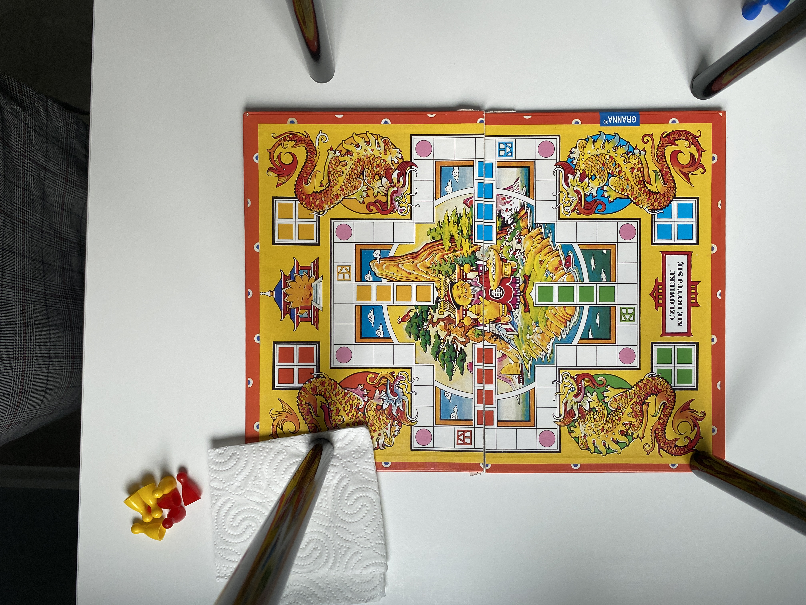

In [4]:
board_clear = cv2.imread('data/board_1.JPG', 1)
# imshow(board_clear)
imshow(cv2.resize(board_clear, None, fx=0.2, fy=0.2))

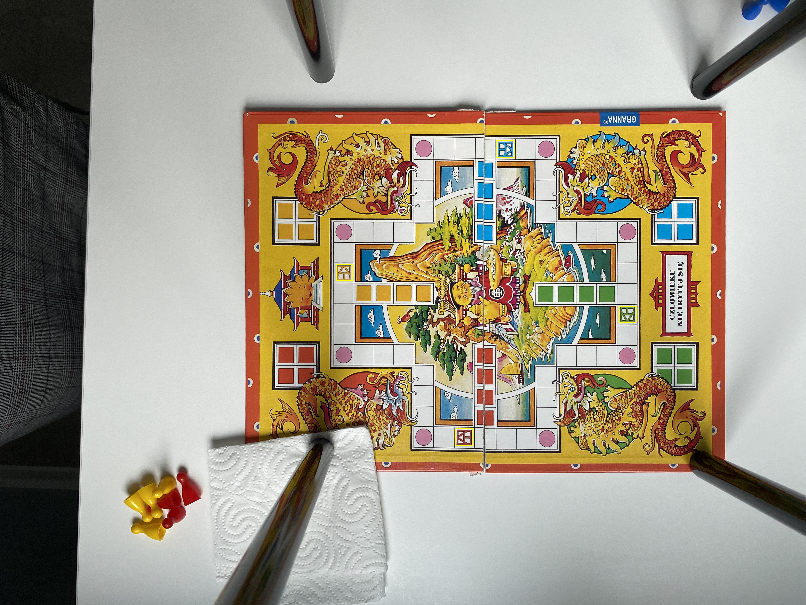

In [5]:
start_templates = ["start_blue", "start_green", "start_red", "start_yellow"]
starts = match_patterns(board_clear, start_templates, color=(0,255,255))
# imshow(starts)
imshow(cv2.resize(starts, None, fx=0.2, fy=0.2))

### Yards

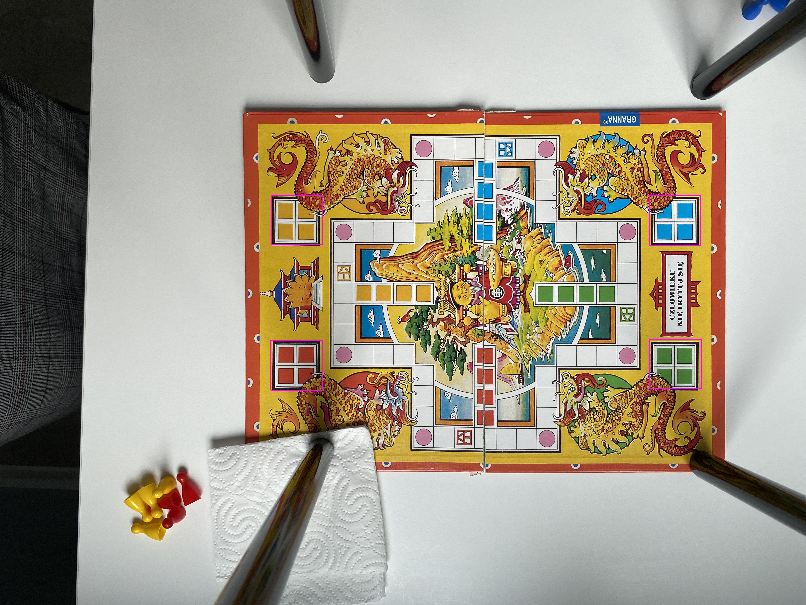

In [6]:
yard_templates = ["yard_blue", "yard_green", "yard_red", "yard_yellow"]
yards = match_patterns(board_clear, yard_templates, color=(255,0,255))
# imshow(yards)
imshow(cv2.resize(yards, None, fx=0.2, fy=0.2))

### Counter detection

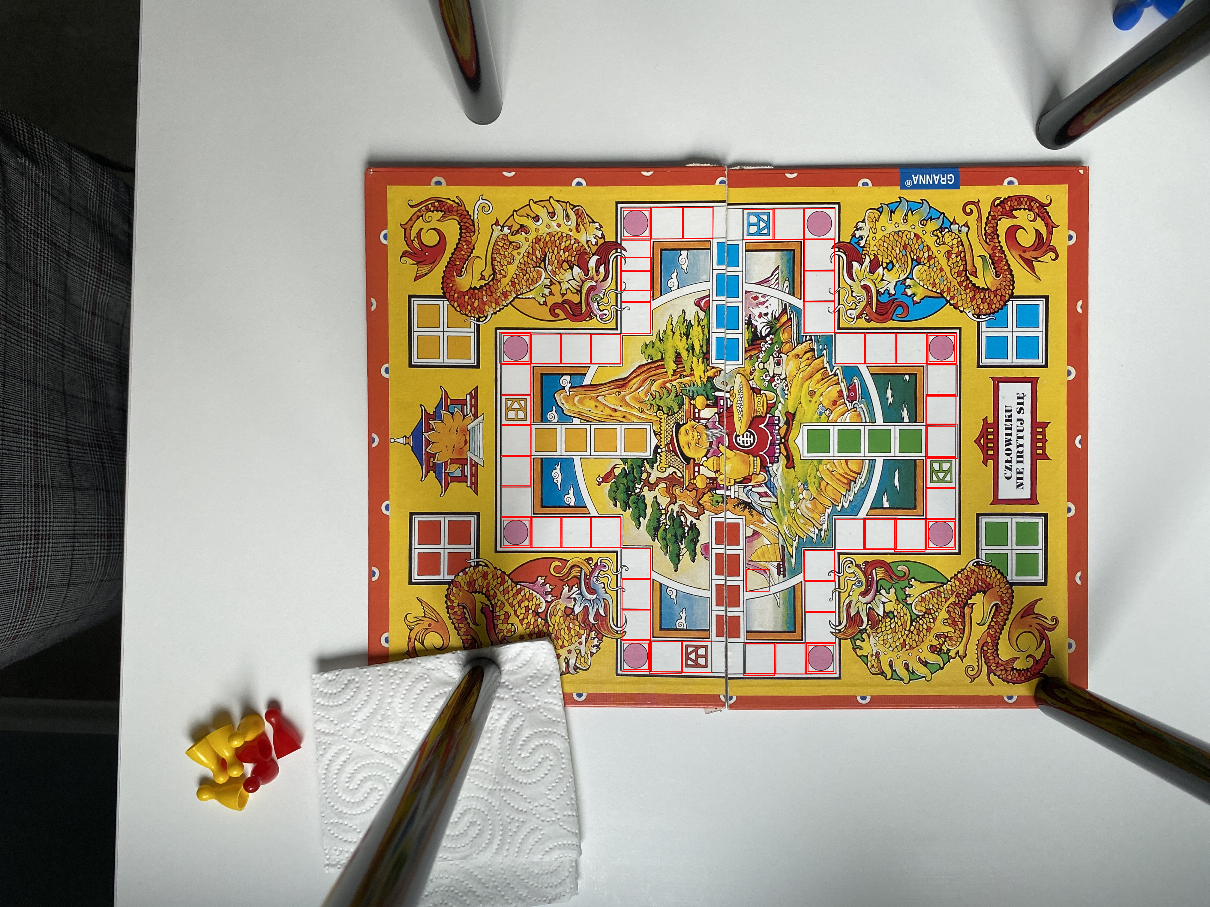

In [7]:
playing_area = get_playing_area(image_name='data/board_1.jpg', rect_size=(50,150), color=(0,0,255))
# imshow(playing_area)
imshow(cv2.resize(playing_area, None, fx=0.3, fy=0.3))